### 4.10 Part 1.25 Mature Basic Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [4]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','000MBC.pkl'))

In [5]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [6]:
df.shape

(19725583, 31)

In [7]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,1.972558e+07,1.972558e+07,1.972558e+07,1.972558e+07,1.972558e+07,1.972558e+07
mean,1.028330e+05,6.099381e+01,1.138116e+05,2.544978e+04,1.780000e+01,9.302869e+00
std,5.938517e+04,1.185609e+01,3.584851e+04,1.417701e+04,1.761135e+01,5.418112e+01
min,2.000000e+00,4.100000e+01,2.900100e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.152400e+04,5.100000e+01,9.548800e+04,1.325200e+04,5.000000e+00,7.391718e+00
50%,1.021990e+05,6.100000e+01,1.157670e+05,2.513300e+04,1.200000e+01,7.824786e+00
75%,1.541110e+05,7.100000e+01,1.425340e+05,3.779200e+04,2.500000e+01,8.244460e+00
max,2.062090e+05,8.100000e+01,1.999270e+05,4.968800e+04,1.000000e+02,1.500694e+04


### 3 -Analyzing Mature Basic Consumer by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [8]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [9]:
df11=df1.drop_duplicates().reset_index()

In [10]:
df11

,index,user_id,fam_status,loyalty_flag
0,0,26711,married,New customer
1,144,133128,married,New customer
2,226,69965,married,Regular customer
3,317,33835,married,Loyal customer
4,357,75032,married,Loyal customer
...,...,...,...,...
103695,10898951,109272,married,New customer
103696,10898988,82612,married,New customer
103697,10899442,181214,married,New customer
103698,10900939,48223,married,New customer


#### -analyzing Mature  Basic Consumer by Loyalty Flag and Family Status

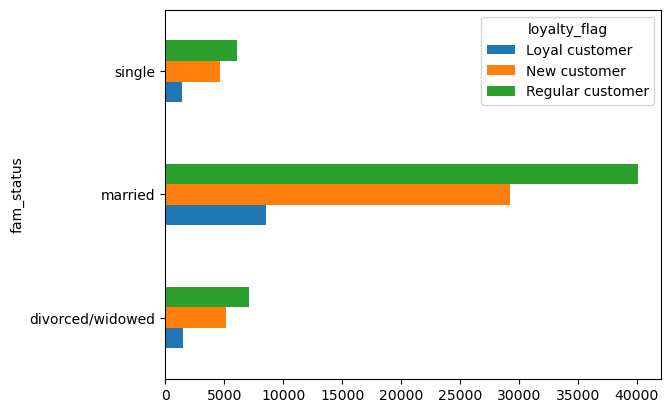

In [11]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_LoyaltyFlag.png'))

### 4 -analyzing Mature  Basic Consumer purshases by their income

In [13]:
df2=df[['prices', 'income']]

In [14]:
df2['prices'].sum()

182502653.09999976

In [15]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [16]:
df22

,mean_purshase
income,
29001,6.648468
29011,6.940702
29017,6.489474
29018,6.437500
29040,6.633333
...,...
197674,45.047066
197854,2832.658192
199536,942.989720


### filter extrem big values

In [17]:
df22filtred=df22[df22['mean_purshase']<4000]

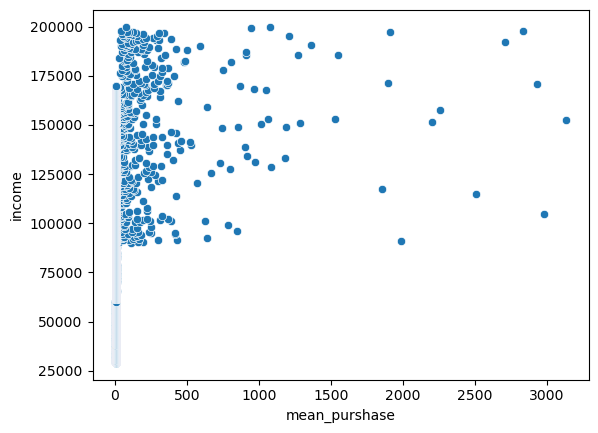

In [18]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtred)

In [19]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_PricesIncome.png'))

### 5 - Analyzing Mature  Basic Consumer by Busiest_day

In [20]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [21]:
df4

,user_id,STATE,busiest_day,day_of_week
0,26711,Missouri,Regularly days,5
1,26711,Missouri,Regularly days,2
2,26711,Missouri,Regularly days,2
3,26711,Missouri,Busiest days,1
4,26711,Missouri,Regularly days,5
...,...,...,...,...
10907397,157930,Massachusetts,Slowest days,3
10907398,157930,Massachusetts,Regularly days,6
10907402,117766,Connecticut,Busiest days,1
10907403,117766,Connecticut,Regularly days,5


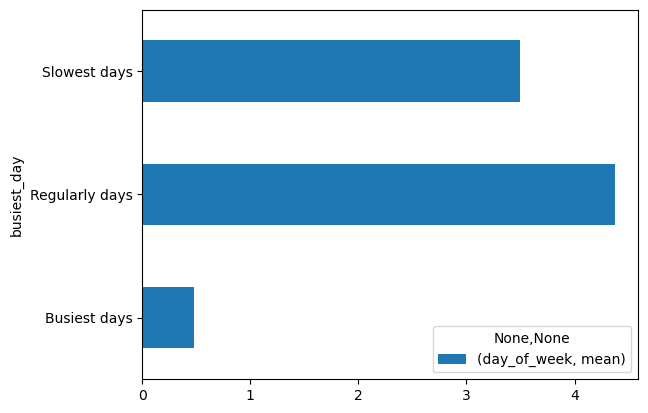

In [22]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [23]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_BusiestDayOfWeek.png'))

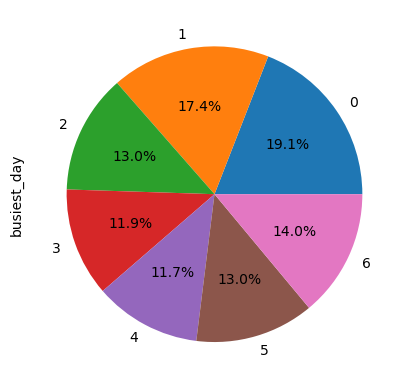

In [24]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [25]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    3764716
1    3426012
2    2571153
3    2341536
4    2302862
5    2566340
6    2752964
Name: busiest_day, dtype: int64

In [26]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [27]:
df44=df[['order_hour_of_day','user_id']]

In [28]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      130299
1       68599
2       40484
3       30433
4       31889
5       53611
6      176234
7      551151
8     1061647
9     1505598
10    1684612
11    1661102
12    1589678
13    1615976
14    1635079
15    1608487
16    1538088
17    1267876
18     994680
19     764873
20     595605
21     487760
22     384403
23     247419
Name: user_id, dtype: int64

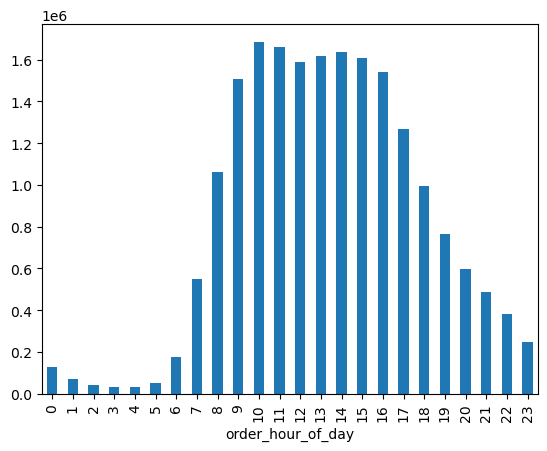

In [29]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [30]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_BusiestHourOfDay.png'))

### 6 - Analyzing number of Mature  Basic Consumers by State

In [31]:
df5=df[['user_id','STATE']]

In [32]:
DF5=df5.drop_duplicates().reset_index()

In [33]:
DF5

,index,user_id,STATE
0,0,26711,Missouri
1,144,133128,Kentucky
2,226,69965,Texas
3,317,33835,Nebraska
4,357,75032,Georgia
...,...,...,...
103695,10898951,109272,Ohio
103696,10898988,82612,Tennessee
103697,10899442,181214,Georgia
103698,10900939,48223,North Carolina


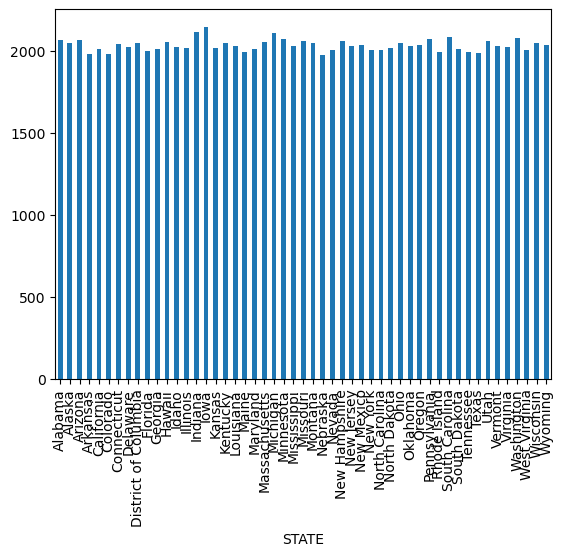

In [34]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [35]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 2063
Alaska                  2047
Arizona                 2064
Arkansas                1977
California              2012
Colorado                1980
Connecticut             2043
Delaware                2023
District of Columbia    2046
Florida                 1997
Georgia                 2009
Hawaii                  2050
Idaho                   2023
Illinois                2019
Indiana                 2112
Iowa                    2146
Kansas                  2016
Kentucky                2045
Louisiana               2029
Maine                   1991
Maryland                2010
Massachusetts           2050
Michigan                2109
Minnesota               2071
Mississippi             2029
Missouri                2058
Montana                 2044
Nebraska                1975
Nevada                  2005
New Hampshire           2056
New Jersey              2027
New Mexico              2032
New York                2003
North Carolina          2004
North Da

#### Defining TOP States

In [35]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Iowa              2146
Indiana           2112
Michigan          2109
South Carolina    2083
Washington        2078
Pennsylvania      2071
Minnesota         2071
Arizona           2064
Alabama           2063
Missouri          2058
Name: user_id, dtype: int64

#### -saving the plot

In [36]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_UsersNumberState.png'))

### 7 - Analyzing Mature  Basic Consumer  by n_dependants

In [37]:
df6=df[['user_id', 'n_dependants']]

In [38]:
DF6=df6.drop_duplicates()

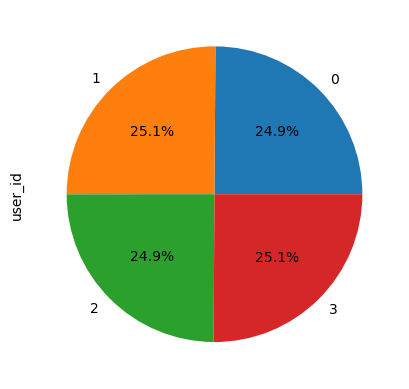

In [39]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [40]:
DF6

,user_id,n_dependants
0,26711,3
144,133128,2
226,69965,1
317,33835,2
357,75032,1
...,...,...
10898951,109272,3
10898988,82612,3
10899442,181214,2
10900939,48223,1


#### saving the plot

In [41]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

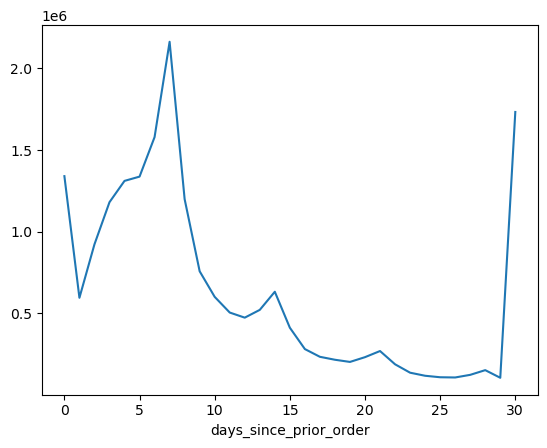

In [42]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [43]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     1340223
1      594806
2      922354
3     1180577
4     1311180
5     1337317
6     1579443
7     2163567
8     1199143
9      757238
10     600511
11     504442
12     473125
13     520830
14     631897
15     411490
16     280569
17     233204
18     215153
19     201836
20     231033
21     268595
22     187355
23     135836
24     117071
25     107930
26     106576
27     122671
28     151483
29     104683
30    1733445
Name: days_since_prior_order, dtype: int64

In [44]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [45]:
df18=df[['product_name','product_id','prices']]

In [46]:
df18

,product_name,product_id,prices
0,Soda,196,9.0
1,0% Greek Strained Yogurt,38928,12.6
2,,0,0.0
3,0% Greek Strained Yogurt,38928,12.6
4,0% Greek Strained Yogurt,38928,12.6
...,...,...,...
10907397,Plain Bagels,20738,7.0
10907398,,0,0.0
10907402,Soda,196,9.0
10907403,Zero Calorie Cola,46149,13.4


#### identifying the most populare products counting orders rows and selecting 10 TOP

In [47]:
df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index()

,product_name,prices
0,Banana,286616
1,Bag of Organic Bananas,233449
2,Organic Strawberries,162916
3,Organic Baby Spinach,147799
4,Organic Hass Avocado,132583
...,...,...
49338,Simply Whole Wheat Bread,1
49339,Hot Fudge Ice Cream Sauce,1
49340,Organic Ice Cream Birthday Cake,1
49341,Seasoned Tomato Sauce,1


In [48]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(11)

In [49]:
DF18

,product_name,prices
0,Banana,286616
1,Bag of Organic Bananas,233449
2,Organic Strawberries,162916
3,Organic Baby Spinach,147799
4,Organic Hass Avocado,132583
5,,122068
6,Organic Avocado,106315
7,Large Lemon,92012
8,Strawberries,87024
9,Limes,85433


In [50]:
DF19=DF18.drop(index=5)

In [51]:
DF19=DF19.rename(columns={'prices':'count_orders'})

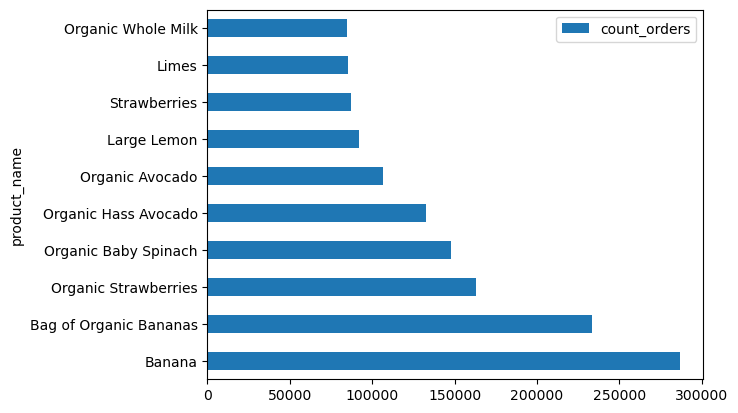

In [52]:
Bar21=DF19.plot.barh(x='product_name')

#### -saving the plot

In [53]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MBC_Products.png'))